# Decomposed ZFOURGE Galaxies UVJ Colour Analysis
This script is intended to be used to perform a colour analysis on the UVJ colours that have been calculated in the script SEDProcessing_DecomposedSEDs_Full. This will extend the analysis and will atempt to create some metric to be able to explore the UVJ colour space. Additinally we also will attempt to read in and combine the UVJ colours as per the id's with actual data from the ZFOURGE survey to explore the UVJ colour space in more detail. This will be intended to be used as a base for the rest of my analysis in other colour spaces.

In [32]:
# Read in required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from carf import *


In [33]:
# Now we can read in the colours of the galaxies
decomposed_colours = pd.read_csv('datasets/full_zfourge_decomposed/decomposed_colours.csv')

# Check length of the output
print(decomposed_colours.shape)


(11449, 10)


In [34]:
# Check where na <- this may have been an inccorrect sampling.
print(decomposed_colours.isna().sum())


ID                 0
UV_Full            1
VJ_Full            1
UV_Decomposed      4
VJ_Decomposed      4
zpk                0
UG_Full            1
GR_Full            1
UG_Decomposed    573
GR_Decomposed    573
dtype: int64


In [35]:
decomposed_colours.isna().sum()

# Drop the rows with missing values
decomposed_colours = decomposed_colours.dropna()

# recount the number of missing values
decomposed_colours.isna().sum()


# Check the length of the output
print(decomposed_colours.shape)


(10876, 10)


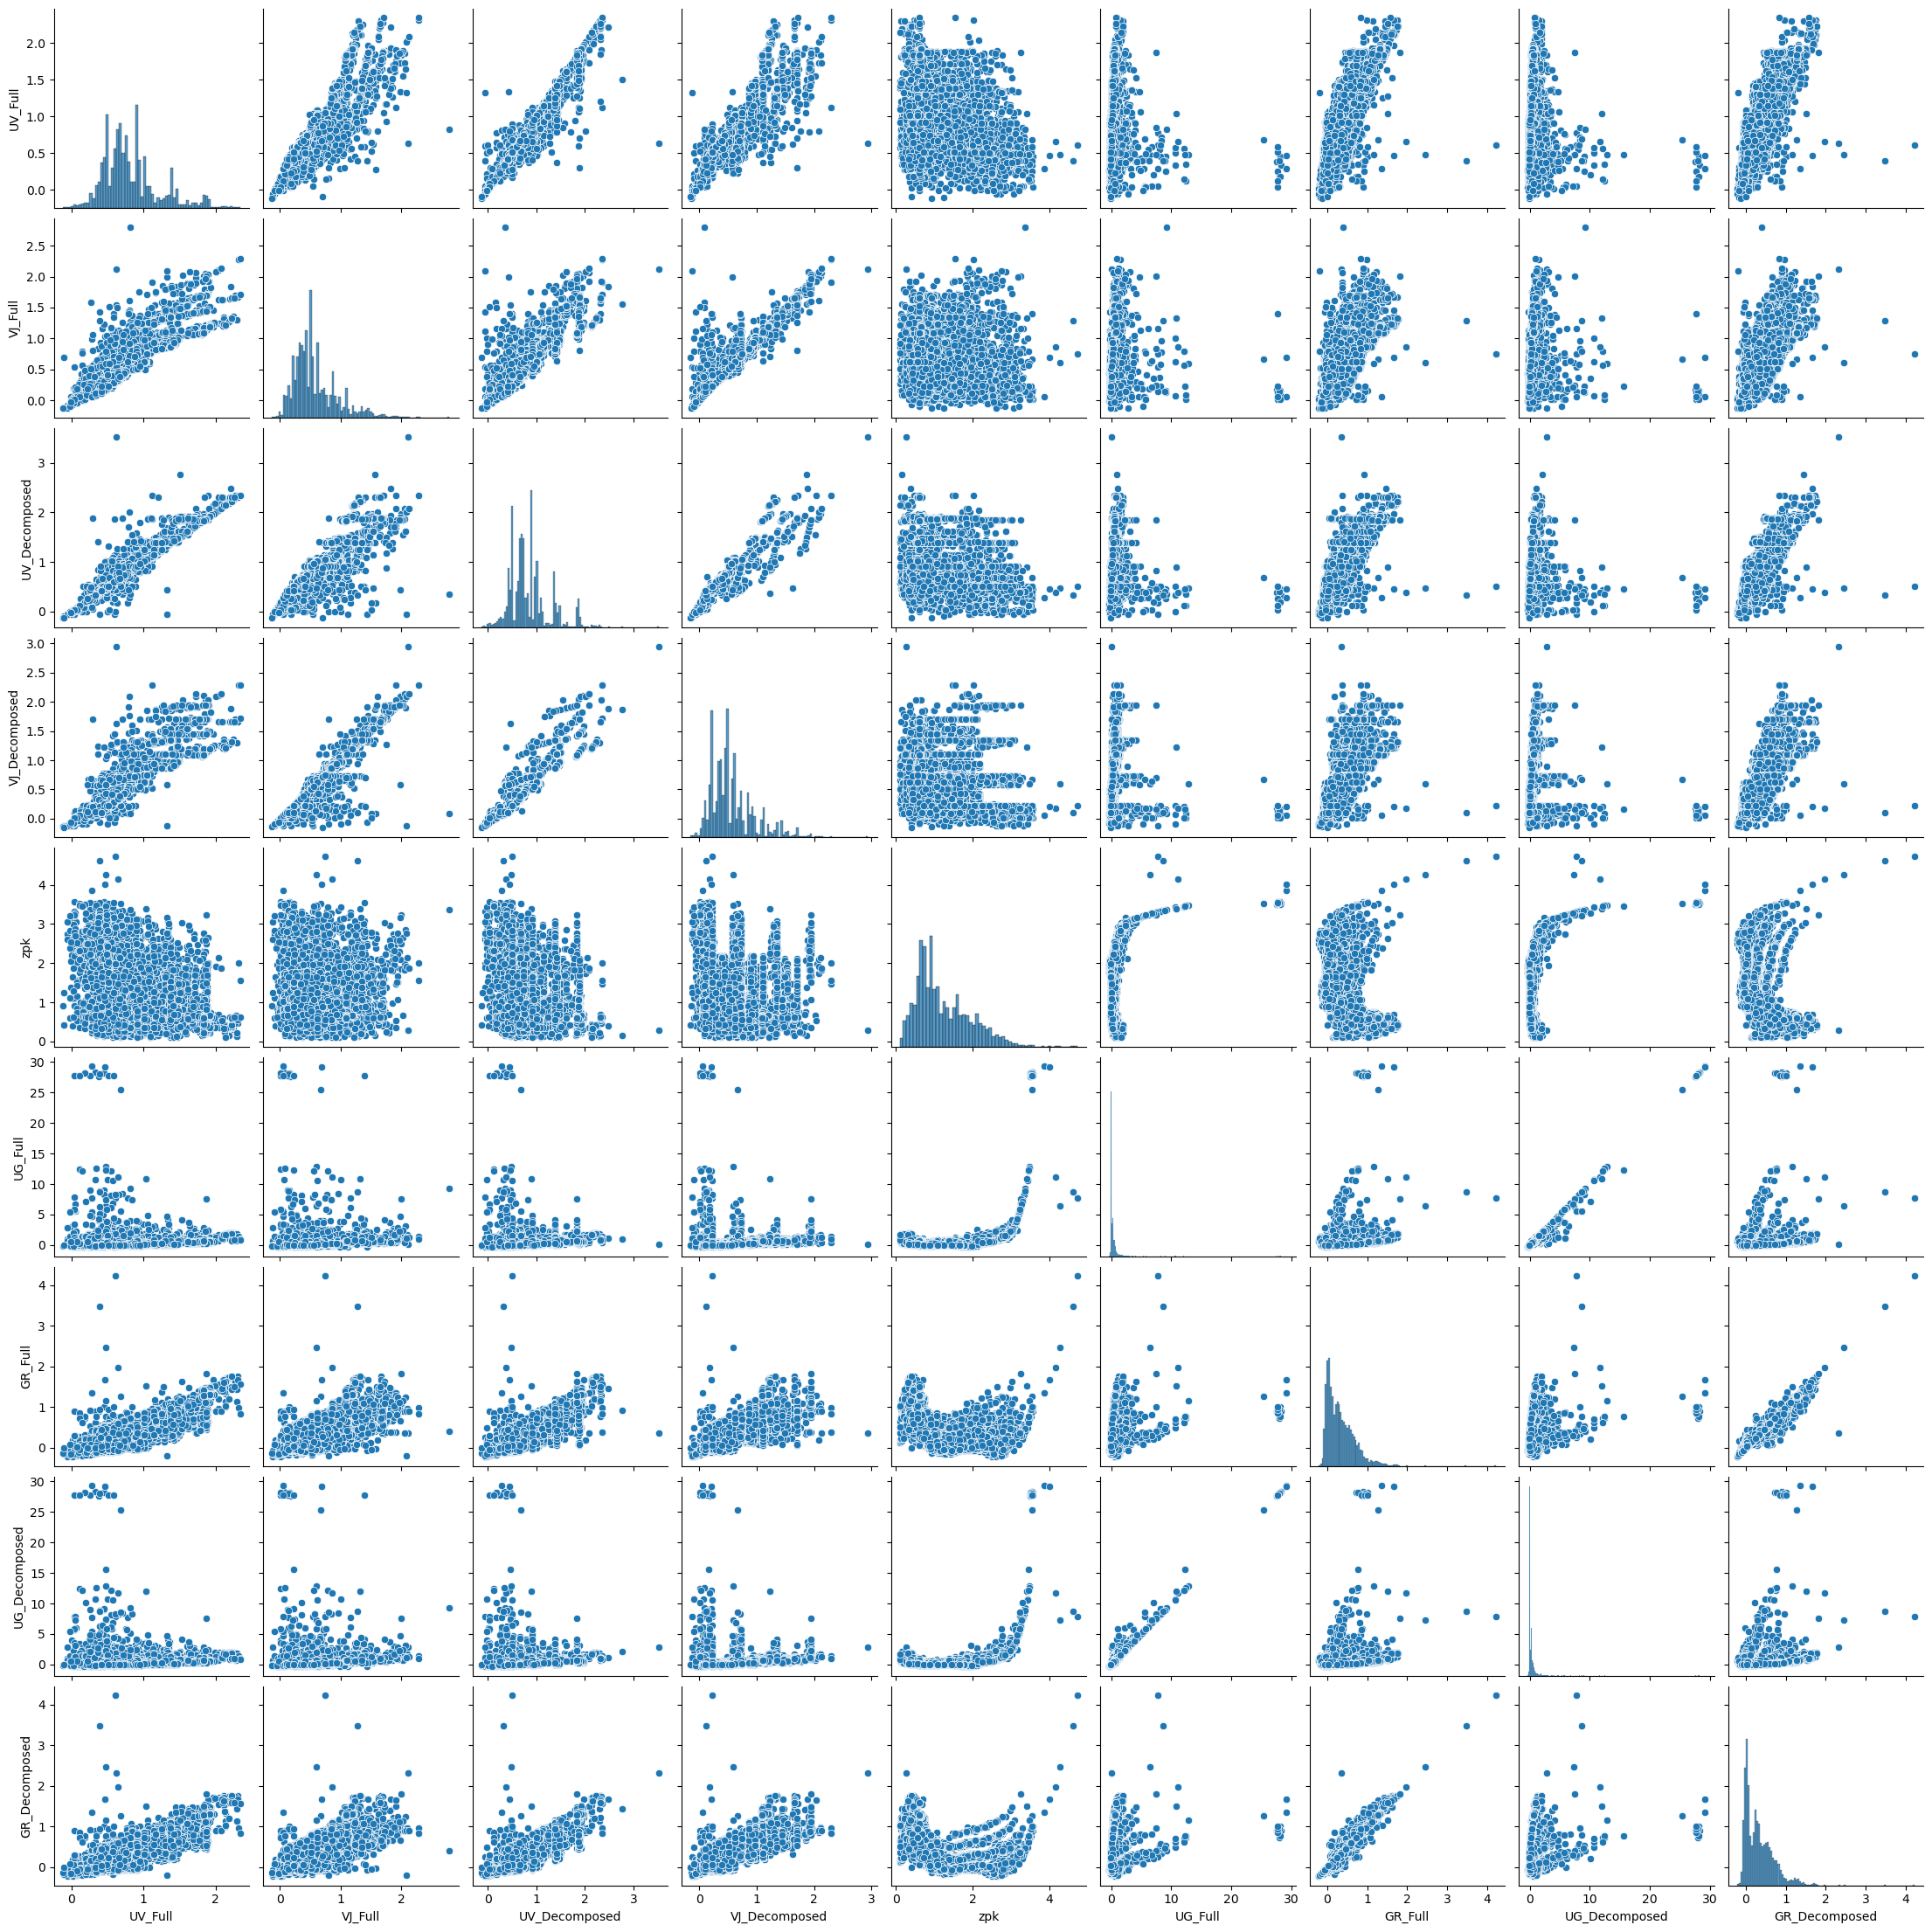

In [36]:
# Quickly create a pairplot to se the relationships between the colours, from fully decomposed to the original galaxy colours
sns.pairplot(decomposed_colours)

Average VJ Full: 0.5739012467015094Average UV Full: 0.8228596390126018Average VJ Galaxy: 0.55521488932051Average UV Galaxy: 0.8483531092079057


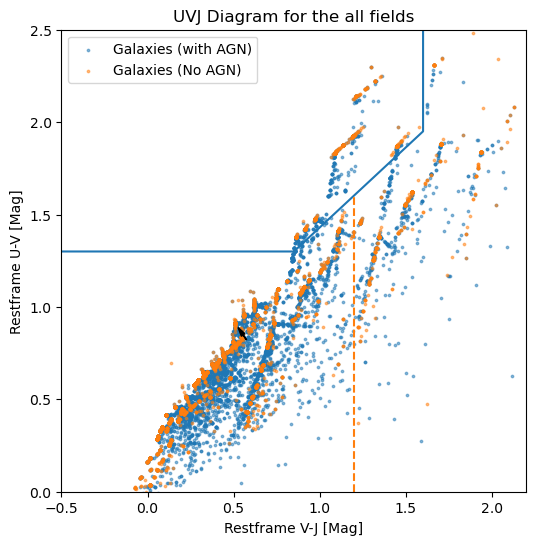

In [37]:
# Now we would like to make two plots, one for the fully decomposed colours and one for the original galaxy colours. These should be UVJ colour plots and should highlight the difference between the two sets of colours.

# extract the fully decomposed colours
vj_galaxy_colours = decomposed_colours['VJ_Decomposed']
uv_galaxy_colours = decomposed_colours['UV_Decomposed']

# extract the original galaxy colours
vj_full_colours = decomposed_colours['VJ_Full']
uv_full_colours = decomposed_colours['UV_Full']



plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0


# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]

# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='Galaxies (with AGN)')

plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='Galaxies (No AGN)')


# Instead of plotting all arrows, define an average arrow 
# we want to get the average location of each set of points, and plot the transition


# Get the average location of each set of points
avg_vj_full = np.mean(vj_full_colours)
avg_uv_full = np.mean(uv_full_colours)

avg_vj_galaxy = np.mean(vj_galaxy_colours)
avg_uv_galaxy = np.mean(uv_galaxy_colours)


print(f'Average VJ Full: {avg_vj_full}'
      f'Average UV Full: {avg_uv_full}'
      f'Average VJ Galaxy: {avg_vj_galaxy}'
      f'Average UV Galaxy: {avg_uv_galaxy}')

# Plot the average arrow
plt.arrow(avg_vj_full, avg_uv_full, avg_vj_galaxy - avg_vj_full, avg_uv_galaxy - avg_uv_full, head_width=0.025, head_length=0.05, fc='k', ec='k')



# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.legend()
#plt.savefig('outputs/UVJ_Diagram_with_AGN_decom_Allfields_Avg.png')
plt.show()

Average VJ Full: 1.3136510314571224Average UV Full: 1.5962838642413724Average VJ Galaxy: 1.3289121381527558Average UV Galaxy: 1.6737149263431657


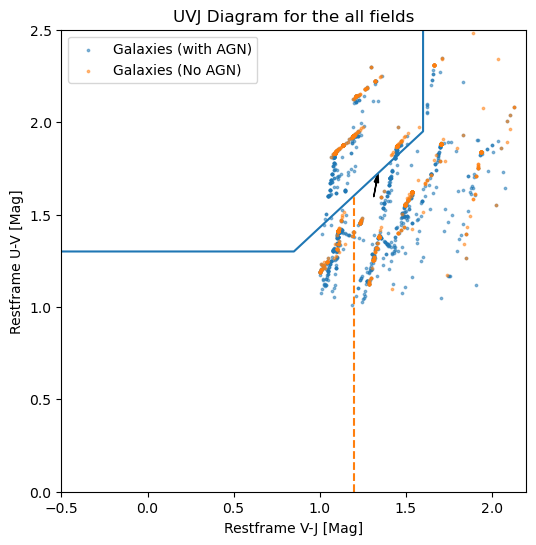

In [38]:
# We would like to extract subsets of this data
# extract the fully decomposed colours


# Only select rows which have a UV colour of 1 or great AND a VJ colour of 0.75 or greater

uv_thresh = 1
vj_thresh = 1

condition = (decomposed_colours['UV_Decomposed'] >= uv_thresh) & (decomposed_colours['VJ_Decomposed'] >= vj_thresh)

# additional constraint on full colours
condition = condition & (decomposed_colours['UV_Full'] >= uv_thresh) & (decomposed_colours['VJ_Full'] >= vj_thresh)


decomposed_colours_filtered = decomposed_colours[condition]


vj_galaxy_colours = decomposed_colours_filtered['VJ_Decomposed']
uv_galaxy_colours = decomposed_colours_filtered['UV_Decomposed']

# extract the original galaxy colours
vj_full_colours = decomposed_colours_filtered['VJ_Full']
uv_full_colours = decomposed_colours_filtered['UV_Full']


# We would like to filter the colours to only include the galax


plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0


# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]

# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='Galaxies (with AGN)')

plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='Galaxies (No AGN)')


# Instead of plotting all arrows, define an average arrow 
# we want to get the average location of each set of points, and plot the transition


# Get the average location of each set of points
avg_vj_full = np.mean(vj_full_colours)
avg_uv_full = np.mean(uv_full_colours)

avg_vj_galaxy = np.mean(vj_galaxy_colours)
avg_uv_galaxy = np.mean(uv_galaxy_colours)


print(f'Average VJ Full: {avg_vj_full}'
      f'Average UV Full: {avg_uv_full}'
      f'Average VJ Galaxy: {avg_vj_galaxy}'
      f'Average UV Galaxy: {avg_uv_galaxy}')

# Plot the average arrow
plt.arrow(avg_vj_full, avg_uv_full, avg_vj_galaxy - avg_vj_full, avg_uv_galaxy - avg_uv_full, head_width=0.025, head_length=0.05, fc='k', ec='k')



# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.legend()
#plt.savefig('outputs/UVJ_Diagram_with_AGN_decom_Allfields_Avg.png')
plt.show()

In [39]:
# We want to do a similar technique but instead  we want to create 10 different thresholds ranging from 0.5 to 1 in steps of 0.05
thresholds = np.arange(0.5, 1.05, 0.05)
print(thresholds)

[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


Average VJ Full: 0.8330344326674921Average UV Full: 1.1118269836365033Average VJ Galaxy: 0.8352158639682796Average UV Galaxy: 1.1569430719874467
Average VJ Full: 0.9088808276019681Average UV Full: 1.1773650537656681Average VJ Galaxy: 0.9123047496523874Average UV Galaxy: 1.2272534234855839
Average VJ Full: 0.956333770104196Average UV Full: 1.2202341511234567Average VJ Galaxy: 0.9601801173914961Average UV Galaxy: 1.2725202789247174
Average VJ Full: 1.0204560151233386Average UV Full: 1.2729132855732697Average VJ Galaxy: 1.0255768133216896Average UV Galaxy: 1.3304141974251535
Average VJ Full: 1.0515300413566346Average UV Full: 1.3248967013368094Average VJ Galaxy: 1.0578488740367236Average UV Galaxy: 1.3846699435526473
Average VJ Full: 1.1139815749424558Average UV Full: 1.4147629792179501Average VJ Galaxy: 1.1264108472954952Average UV Galaxy: 1.4826221483956932
Average VJ Full: 1.122417377162127Average UV Full: 1.426814099024775Average VJ Galaxy: 1.1337897616041122Average UV Galaxy: 1.49228

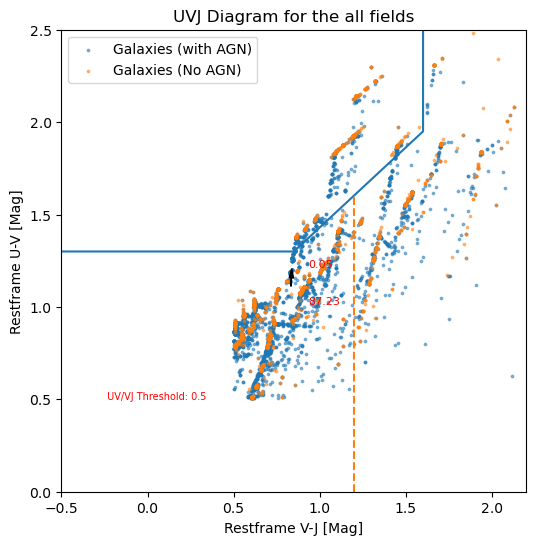

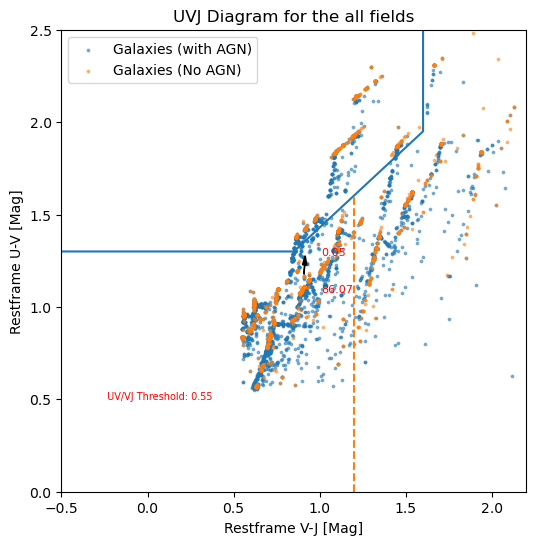

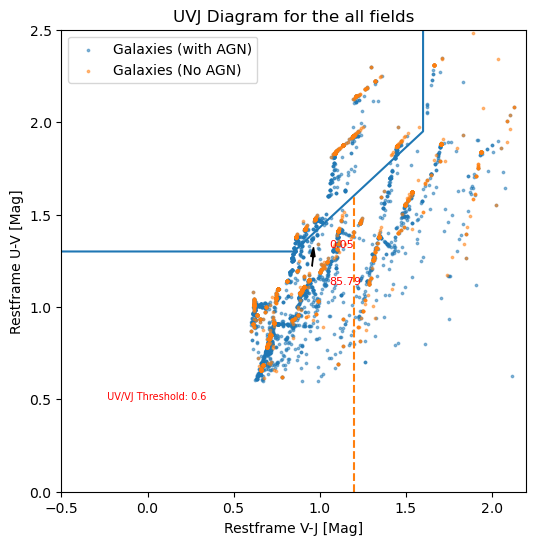

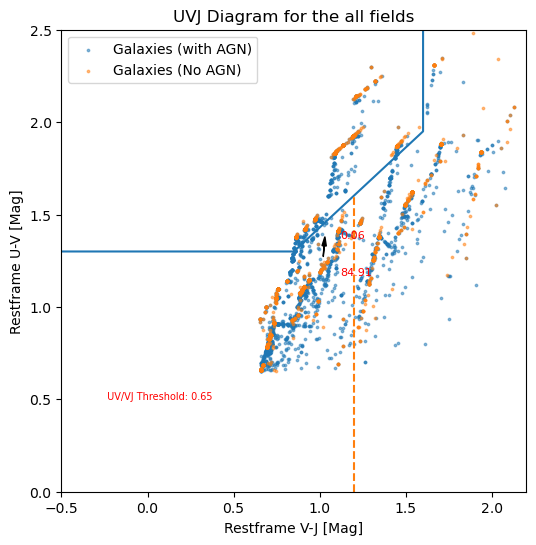

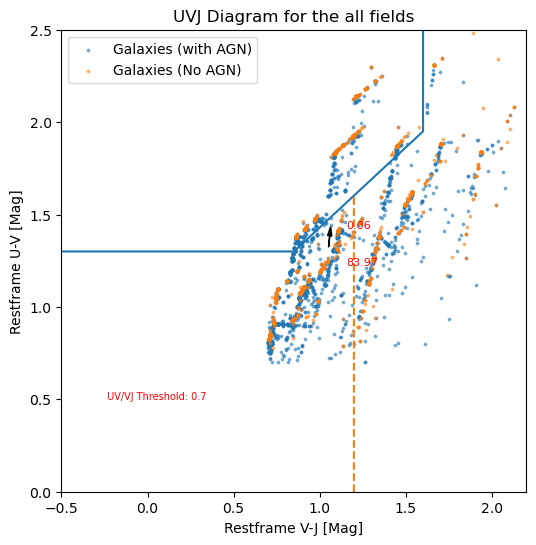

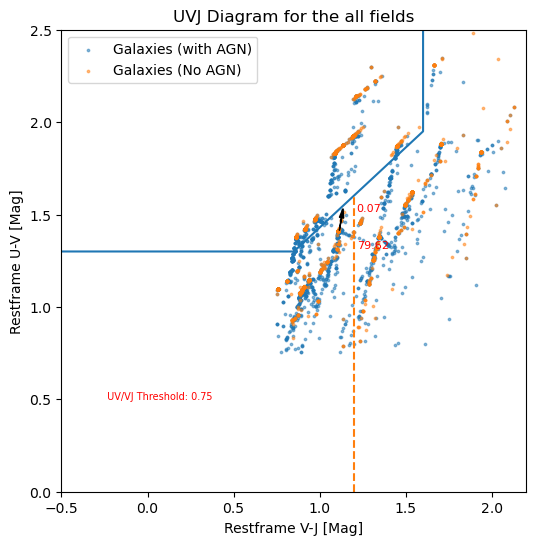

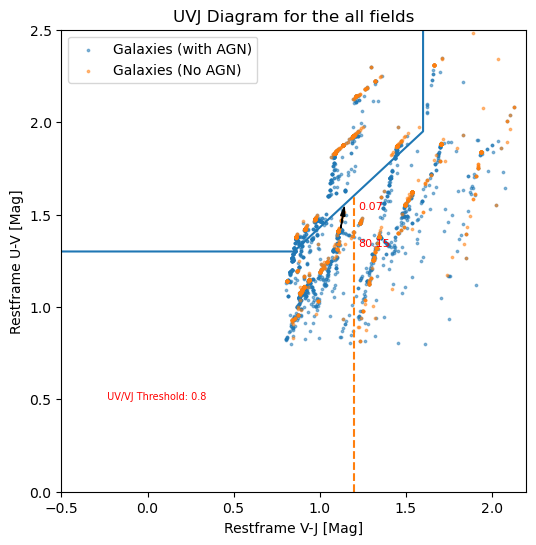

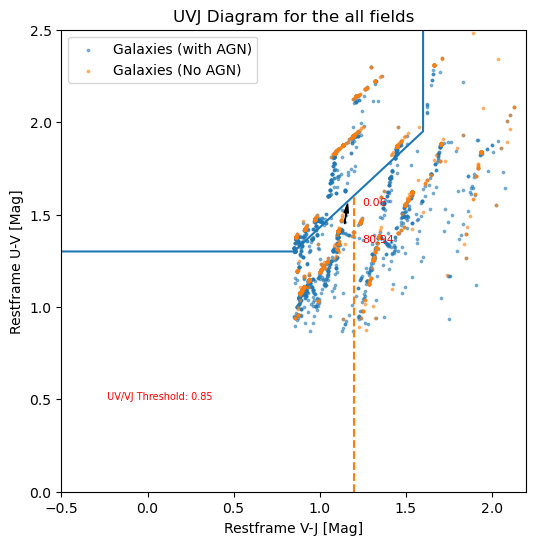

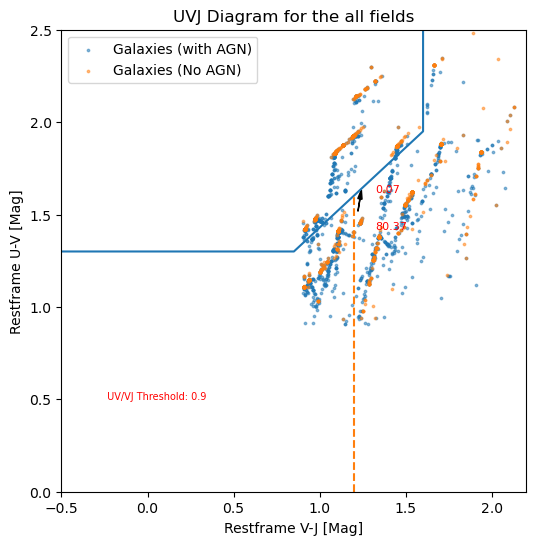

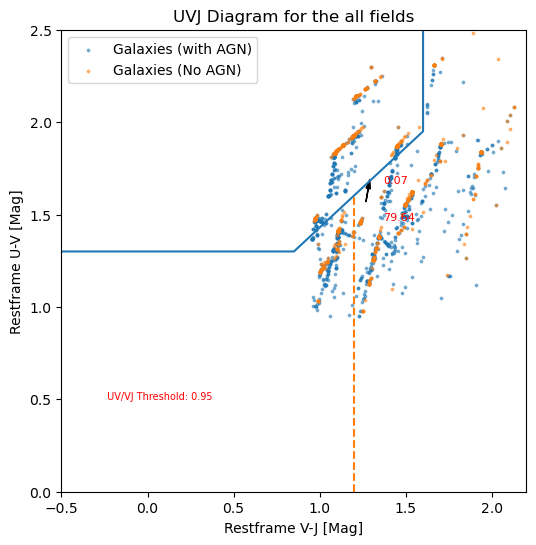

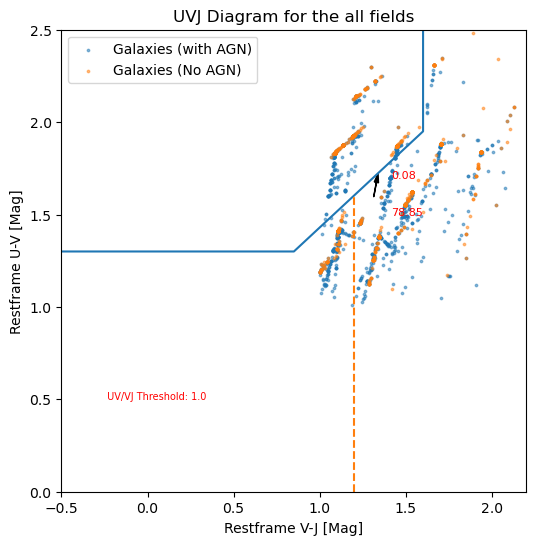

In [40]:
for threshold in thresholds:
    uv_thresh = threshold
    vj_thresh = threshold

    condition = (decomposed_colours['UV_Decomposed'] >= uv_thresh) & (decomposed_colours['VJ_Decomposed'] >= vj_thresh)

    # additional constraint on full colours
    condition = condition & (decomposed_colours['UV_Full'] >= uv_thresh) & (decomposed_colours['VJ_Full'] >= vj_thresh)


    decomposed_colours_filtered = decomposed_colours[condition]


    vj_galaxy_colours = decomposed_colours_filtered['VJ_Decomposed']
    uv_galaxy_colours = decomposed_colours_filtered['UV_Decomposed']

    # extract the original galaxy colours
    vj_full_colours = decomposed_colours_filtered['VJ_Full']
    uv_full_colours = decomposed_colours_filtered['UV_Full']


    # We would like to filter the colours to only include the galax


    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0


    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)


    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # as all the points have associated names, plot the names
    #for i, txt in enumerate(df['ID']):
    #    plt.annotate(txt, (x[i], y[i]))
        
    # plot the points
    plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='Galaxies (with AGN)')

    plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='Galaxies (No AGN)')


    # Instead of plotting all arrows, define an average arrow 
    # we want to get the average location of each set of points, and plot the transition


    # Get the average location of each set of points
    avg_vj_full = np.mean(vj_full_colours)
    avg_uv_full = np.mean(uv_full_colours)

    avg_vj_galaxy = np.mean(vj_galaxy_colours)
    avg_uv_galaxy = np.mean(uv_galaxy_colours)


    print(f'Average VJ Full: {avg_vj_full}'
        f'Average UV Full: {avg_uv_full}'
        f'Average VJ Galaxy: {avg_vj_galaxy}'
        f'Average UV Galaxy: {avg_uv_galaxy}')

    # Plot the average arrow
    plt.arrow(avg_vj_full, avg_uv_full, avg_vj_galaxy - avg_vj_full, avg_uv_galaxy - avg_uv_full, head_width=0.025, head_length=0.05, fc='k', ec='k')

    # Additionally plot some text next to the average arrow displaying the magnitude of the length of the arrow
    plt.text(avg_vj_full + 0.1, avg_uv_full + 0.1, f'{round(np.sqrt((avg_vj_galaxy - avg_vj_full)**2 + (avg_uv_galaxy - avg_uv_full)**2), 2)}', fontsize=8, color='red')

    # also calculate and plot the degrees
    angle = np.arctan2(avg_uv_galaxy - avg_uv_full, avg_vj_galaxy - avg_vj_full) * 180 / np.pi
    
    # Plot below the arrow 
    plt.text(avg_vj_full + 0.1, avg_uv_full - 0.1, f'{round(angle, 2)}', fontsize=8, color='red')
    
    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    # Include text with the threshold value
    plt.text(-0.25, 0.5, f' UV/VJ Threshold: {round(threshold, 2)}', fontsize=7, color='red')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the all fields')
    plt.legend()
    # Save the plot with the thresh value
    plt.savefig(f'outputs/UVJ_Diagram_with_AGN_decom_Allfields_Avg_{round(threshold, 2)}.png')
plt.show()

From running this analysis we see that by taking slices of this decomposition based on the threshold of values we are looking at, we can effectively see how the inital UVJ colours change. Notably we can see that mostly red quiescent galaxies, and dusty galaxies show the largest amount of change to their colurrs and moving up into the right most area shows that this transition will take place. 

In [41]:
# We would now like to combine this dataframe, with the cdfs, uds, and cosmos dataframes, so that we can generate insights into the information
# of the actual night sky sources.

#cdfs
zfourge_path = 'datasets/zfourge/'

# Read in ZFourge Data in each field

#CDFS, COSMOS, UDS
cdfs_df = read_zfourge_data('CDFS', zfourge_path)
cosmos_df = read_zfourge_data('COSMOS', zfourge_path)
uds_df = read_zfourge_data('UDS', zfourge_path)


c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\Documents\GitHub\HonoursResearchProject\carf.py:1152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, 'mag_V'] = flux_to_mag(df['V'])
c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\Documents\GitHub\HonoursResearchProject\carf.py:1153: Performanc

In [42]:
# Now I can choose to combine these dataframes into a master frame base
master_df = pd.concat([cdfs_df, cosmos_df, uds_df])


In [43]:
master_df

# rename id to ID
master_df = master_df.rename(columns={'id': 'ID'})

In [44]:
decomposed_colours

,ID,UV_Full,VJ_Full,UV_Decomposed,VJ_Decomposed,zpk,UG_Full,GR_Full,UG_Decomposed,GR_Decomposed
0,CDFS_10005,0.910699,0.733106,0.910699,0.733106,1.7572,0.329656,0.264762,0.329656,0.264762
1,CDFS_10011,1.380354,0.863838,1.380354,0.863838,0.7800,0.048676,0.632581,0.048676,0.632581
2,CDFS_10028,0.443387,0.203338,0.443382,0.203213,1.3215,0.065890,-0.044862,0.065889,-0.044868
3,CDFS_10029,0.910699,0.733106,0.910699,0.733106,1.1036,0.238083,0.252295,0.238083,0.252295
4,CDFS_10032,1.296815,0.850163,1.373219,0.859937,1.0506,0.058645,0.362414,-0.002430,0.338892
...,...,...,...,...,...,...,...,...,...,...
11444,UDS_9980,0.498417,0.414585,0.509884,0.225754,2.4383,0.614829,0.133008,0.558263,0.016816
11445,UDS_9981,0.672092,0.387498,0.672092,0.387498,1.0967,0.010759,0.056136,0.010759,0.056136
11446,UDS_9992,0.495456,0.241327,0.509884,0.225754,2.2368,0.369394,0.068396,0.357596,0.052881
11447,UDS_9995,0.509884,0.225754,0.509884,0.225754,0.7328,-0.033343,0.241050,-0.033343,0.241050


In [45]:
# Now we would like to merge the decomposed colours with the master dataframe

master_df = master_df.merge(decomposed_colours, on='ID', how='inner')

In [46]:
master_df

,recno,ID,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,wminAll,UV_Full,VJ_Full,UV_Decomposed,VJ_Decomposed,zpk_y,UG_Full,GR_Full,UG_Decomposed,GR_Decomposed
0,5746,CDFS_5746,4778.412,2191.809,53.067131,-27.883856,2,362.0,2.69849,0.09566,...,NaN,0.689810,0.714080,0.689732,0.711157,2.9412,1.750977,0.474700,1.751233,0.474652
1,5928,CDFS_5928,4865.992,2198.946,53.063004,-27.883558,3,68.0,3.42457,0.10040,...,NaN,1.708819,1.109138,1.874559,1.133087,0.7154,0.422665,1.027818,0.369333,1.208906
2,5972,CDFS_5972,4686.141,2261.246,53.071480,-27.880964,2,300.0,8.39165,0.08648,...,NaN,0.999376,0.905876,0.987690,0.873039,0.9668,0.202035,0.266554,0.193878,0.247864
3,6179,CDFS_6179,4611.903,2274.999,53.074982,-27.880394,2,105.0,2.53720,0.08840,...,NaN,1.410744,1.106698,1.410744,1.106698,1.0748,0.255607,0.401815,0.255607,0.401815
4,6237,CDFS_6237,4887.093,2276.822,53.062008,-27.880312,0,76.0,2.11567,0.08941,...,NaN,0.633020,0.328743,0.633020,0.328743,0.7676,-0.062140,0.245327,-0.062140,0.245327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,22044,UDS_22044,3566.430,4893.681,34.280075,-5.112765,2,185.0,3.65836,0.07091,...,0.83,0.909005,0.757147,0.910699,0.733106,1.6291,0.292016,0.258233,0.281558,0.235555
10872,22049,UDS_22049,2294.715,4952.961,34.333279,-5.110303,0,19.0,0.40911,0.07459,...,0.75,0.452972,0.251804,0.414096,0.108096,1.2635,0.018853,-0.038792,0.007085,-0.068764
10873,22054,UDS_22054,3385.125,4948.140,34.287659,-5.110497,0,72.0,1.21011,0.07268,...,0.79,0.742504,0.438561,0.742504,0.438561,0.8957,-0.007408,0.149574,-0.007408,0.149574
10874,22059,UDS_22059,1658.167,4916.756,34.359909,-5.111814,0,102.0,1.84542,0.07892,...,0.67,0.913174,0.508098,0.913174,0.508098,0.3706,0.334803,0.810868,0.334803,0.810868


In [47]:
# Check where zpk_x and zpk_y are different
## master_df['zpk_x'] = master_df['zpk_x'].fillna(master_df['zpk_y'])


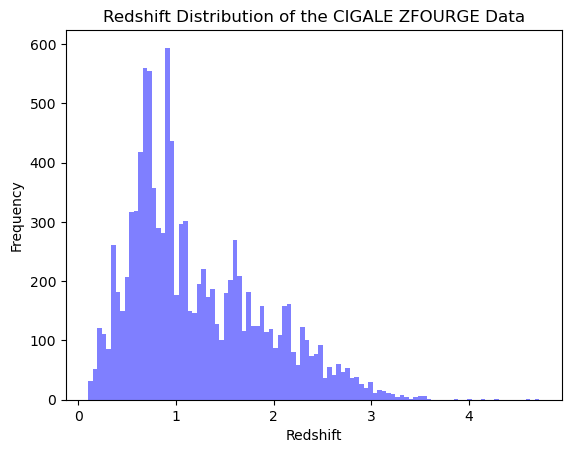

In [48]:
# Show a distribution of the redshifts


plt.hist(master_df['zpk_y'], bins=100, color='blue', alpha=0.5)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Redshift Distribution of the CIGALE ZFOURGE Data')

plt.show()

In [49]:
# Now that we gave a dataframe containing enough of the information that we are concerend with we should be able to generate some insights
# This is a useful dataframe. We should choose to export this so way may look through the data and analyze it

master_df.to_csv('datasets/full_zfourge_decomposed/zfourge_full.csv', index=False)